# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv.

Проверить на наличие дубликатов в идентификаторах пользователей. Сравнить размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Цели и задачи проекта

Цель проекта: Проверить гипотезу о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении Яндекс Книги, чем пользователи из Москвы.

Задачи:

- Загрузить и предобработать данные о пользовательской активности

- Проверить наличие дубликатов и аномалий в данных

- Провести статистический анализ для проверки гипотезы

- Подготовить аналитическую записку с выводами и рекомендациями

## Описание данных

Данные содержат информацию о активности пользователей Яндекс Книг из Москвы и Санкт-Петербурга за период с 1 сентября по 11 декабря 2024 года. Файл содержит следующие поля:

- city - город пользователя (Москва или Санкт-Петербург)

- puid - идентификатор пользователя

- hours - общее количество часов активности пользователя

## Содержимое проекта

- Загрузка данных и знакомство с ними

- Проверка гипотезы в Python

- Аналитическая записка с выводами

---

## 1. Загрузка данных и знакомство с ними

Загружаем данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Пустые ячейки после каждого задания — примерное пространство для работы.
# Вы можете свободно добавлять или удалять ячейки по своему усмотрению в зависимости от логики и объёма работы.

In [2]:
# Используйте ячейки типа Code для вашего кода

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Загрузка данных
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

# Просмотр первых строк данных
print("Первые 5 строк данных:")
print(df.head())

# Информация о данных
print("\nИнформация о данных:")
print(df.info())

# Основные статистики
print("\nОсновные статистики данных:")
print(df.describe())

# Проверка дубликатов
print(f"\nПроверка дубликатов:")
print(f"Количество дубликатов по puid: {df['puid'].duplicated().sum()}")
print(f"Общее количество строк: {len(df)}")
print(f"Уникальных пользователей: {df['puid'].nunique()}")

# Очистим датафрейм
clean_df = df.drop_duplicates(subset=['puid'], keep = 'first')
print (f'Количество строк в очищенном датафрейме: {len(clean_df)}')

print("\nРаспределение по городам:")
users_by_city_1 = clean_df['city'].value_counts()
users_by_city_2 = clean_df['city'].value_counts(normalize=True)
display(users_by_city_1)
display(users_by_city_2)

print("\nСтатистики по столбцу hours:")
stats = clean_df.groupby('city')['hours'].agg(
count='count',
mean='mean',
max='max',
min='min',
median='median',
std='std')
stats

Первые 5 строк данных:
   Unnamed: 0    city    puid       hours
0           0  Москва    9668   26.167776
1           1  Москва   16598   82.111217
2           2  Москва   80401    4.656906
3           3  Москва  140205    1.840556
4           4  Москва  248755  151.326434

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB
None

Основные статистики данных:
        Unnamed: 0          puid        hours
count  8784.000000  8.784000e+03  8784.000000
mean   4391.500000  1.029234e+13    11.087670
std    2535.866716  1.073532e+14    37.701350
min       0.000000  9.668000e+03     0.000018
25%    2195.750000  3.2

Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64

Москва             0.729977
Санкт-Петербург    0.270023
Name: city, dtype: float64


Статистики по столбцу hours:


,count,mean,max,min,median,std
city,,,,,,
Москва,6234,10.881092,857.209373,0.000018,0.924498,36.851683
Санкт-Петербург,2306,11.264433,978.764775,0.000025,0.875355,39.831755



Распределение по hours:


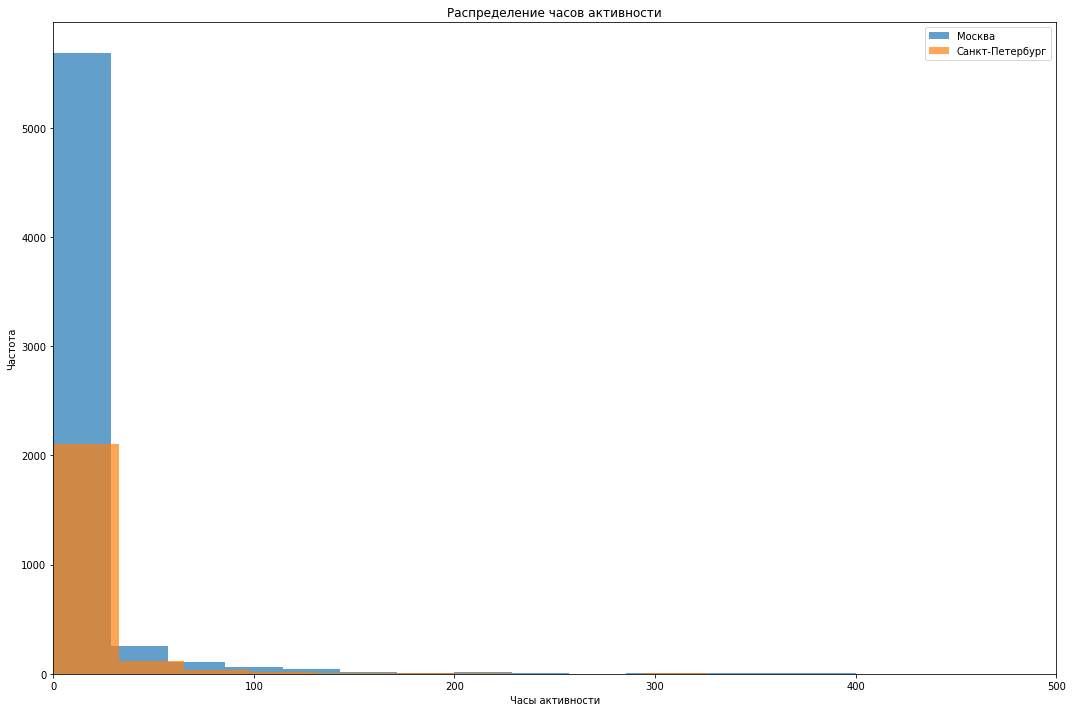

In [4]:
print("\nРаспределение по hours:")
moscow_data = clean_df[clean_df['city'] == 'Москва']['hours']
spb_data = clean_df[clean_df['city'] == 'Санкт-Петербург']['hours']
plt.figure(figsize=(15, 10))
plt.hist(moscow_data, bins=30, alpha=0.7, label='Москва')
plt.hist(spb_data, bins=30, alpha=0.7, label='Санкт-Петербург')
plt.title('Распределение часов активности')
plt.xlabel('Часы активности')
plt.ylabel('Частота')
plt.xlim(0, 500)
plt.legend()
plt.tight_layout()
plt.show()

Анализ размера групп выявил несбалансированность выборок (Москва значительно крупнее) и асимметричное распределение данных во всех группах, о чем свидетельствует разрыв между средним и медианой на фоне высокой вариативности. Учитывая аномалии и смещенность распределения, для сравнения групп был выбран устойчивый непараметрический критерий — тест Манна-Уитни.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [5]:
spb_data = clean_df.loc[clean_df['city']=='Санкт-Петербург', 'hours']
msk_data = clean_df.loc[clean_df['city']=='Москва', 'hours']
stat_mw, p_value = mannwhitneyu(spb_data, msk_data, alternative='greater')

print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимые доказательства, что пользователи из Санкт-Петербурга проводят больше времени в приложении.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых доказательств, что пользователи из Санкт-Петербурга проводят больше времени в приложении.")

p-value: 0.6190
Не отвергаем нулевую гипотезу. Нет статистически значимых доказательств, что пользователи из Санкт-Петербурга проводят больше времени в приложении.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Для сравнения активности пользователей был применен тест Манна-Уитни, как метод, устойчивый к нарушению предположения о нормальности распределения и наличию выбросов. При стандартном уровне значимости (α=0.05) полученное p-value (0.619) существенно превышает порог значимости. Это означает, что статистически значимых различий в средней активности между пользователями из Москвы и Санкт-Петербурга не обнаружено.

Возможными причинами этого результата могут быть:

- Схожий образ жизни: Жители обоих мегаполисов могут использовать приложение в аналогичных ситуациях (например, во время поездок на работу).

- Ограничение выборки: Статистическая мощность анализа могла быть недостаточной для выявления различий.

- Конкуренция: Наличие более популярных альтернативных приложений на рынке.

- Пользовательские предпочтения: Возможная склонность целевой аудитории к использованию традиционных бумажных книг.

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Проверить гипотезу: упрощение интерфейса увеличит конверсию зарегистрированных пользователей в покупателей в течение 7 дней после регистрации на ≥3 процентных пункта

Оценить корректность проведения A/B-теста interface_eu_test

Проанализировать статистическую значимость результатов

Сделать вывод об эффективности нового интерфейса

## 2. Загрузите данные, оцените их целостность.


In [6]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [7]:
display(participants.head())
display(participants.info())

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


None

In [8]:
display(events.head())
display(events.info())

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


None

In [9]:
print(f"Анализ пропусков и дубликатов:")
display(participants.isnull().sum())
display(events.isnull().sum())

duplicates_part = participants.duplicated().sum()
print(f"Количество дубликатов в participants: {duplicates_part}")
duplicates_events = events.duplicated().sum()
print(f"Количество дубликатов в events: {duplicates_events}")

Анализ пропусков и дубликатов:


user_id    0
group      0
ab_test    0
device     0
dtype: int64

user_id            0
event_dt           0
event_name         0
details       538264
dtype: int64

Количество дубликатов в participants: 0
Количество дубликатов в events: 36318


In [10]:
print(f"Удаляем дубликаты из events.")
events = events.drop_duplicates()
duplicates_events_1 = events.duplicated().sum()
print(f"Количество дубликатов в events после удаления: {duplicates_events_1}")

Удаляем дубликаты из events.
Количество дубликатов в events после удаления: 0


Представлены две таблицы:

1. Таблица participants (Участники):

- Объем: Содержит 14 525 записей.

- Структура: Включает 4 атрибута.

- Качество данных: Все данные представлены в текстовом формате (object). Пропущенные значения и полные дублирующие строки отсутствуют.

2. Таблица event (События):

- Объем: Содержит 787 286 записей.

- Структура: Включает 4 атрибута. Столбец event_dt имеет тип «дата и время», остальные — текстовые (object).

- Качество данных: В столбце details наблюдается значительное количество пропусков (538 264, что составляет большую часть данных). Также в таблице было выявлено и удалено 36 318 полных дубликатов строк.

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [11]:
# Проанализируем пересечения пользователей в разных тестах по группам А и В.
group_a = participants[participants['group'] == 'A']
a_multi_tests = group_a.groupby('user_id')['ab_test'].nunique()
a_problem_users = a_multi_tests[a_multi_tests > 1].index
print(f"Количество пользователей в группе A более чем в одном тесте: {len(a_problem_users)}")
participants_eu_clean_1 = participants[~participants['user_id'].isin(a_problem_users)]
print(f"Размер выборки после удаления проблемных пользователей: {participants_eu_clean_1.shape[0]}")

group_b = participants[participants['group'] == 'B']
b_multi_tests = group_b.groupby('user_id')['ab_test'].nunique()
b_problem_users = b_multi_tests[b_multi_tests > 1].index
print(f"Количество пользователей в группе B более чем в одном тесте: {len(b_problem_users)}")
participants_eu_clean_1 = participants[~participants['user_id'].isin(b_problem_users)]
print(f"Размер выборки после удаления проблемных пользователей: {participants_eu_clean_1.shape[0]}")

Количество пользователей в группе A более чем в одном тесте: 325
Размер выборки после удаления проблемных пользователей: 13875
Количество пользователей в группе B более чем в одном тесте: 116
Размер выборки после удаления проблемных пользователей: 14293


In [12]:
# Проанализируем пересечения между интересующм нас тестом и конкурирующим тестом
eu_test = participants.query('ab_test == "interface_eu_test"')
sys_test = participants.query('ab_test == "recommender_system_test"')
tests_intersection = list(set(eu_test.user_id) & set(sys_test.user_id))
print(f'Пересечение пользователей в двух конкурирующих тестах: {len(tests_intersection)}')

Пересечение пользователей в двух конкурирующих тестах: 887


In [13]:
# Удалим пересечения из интересующего нас теста "interface_eu_test".
eu_test_clean = eu_test[~eu_test.user_id.isin(tests_intersection)]
print(f'Исходный размер interface_eu_test: {len(eu_test)}')
print(f'Очищенный размер interface_eu_test: {len(eu_test_clean)}')
print(f'Удалено пользователей: {len(eu_test) - len(eu_test_clean)}')
tests_intersection_2 = set(eu_test_clean.user_id) & set(sys_test.user_id)
print(f'Оставшееся пересечение после очистки: {len(tests_intersection_2)}')

Исходный размер interface_eu_test: 10850
Очищенный размер interface_eu_test: 9963
Удалено пользователей: 887
Оставшееся пересечение после очистки: 0


In [14]:
# Назовем новый датфрейм с интересующим нас тестом для анализа и проверим в нем наличие тестируемых групп A и B
participants_eu_test = eu_test_clean
print(participants_eu_test['group'].unique())

# Проверим датафрейм на дубликаты
duplicates_eu_test = participants_eu_test['user_id'].duplicated().sum()
print(f"Количество дубликатов в participants_eu_test: {duplicates_eu_test}")

['B' 'A']
Количество дубликатов в participants_eu_test: 0


In [15]:
group_a = participants_eu_test[participants_eu_test['group'] == 'A']['user_id'].unique().shape[0]
group_b = participants_eu_test[participants_eu_test['group'] == 'B']['user_id'].unique().shape[0]
print(f' Количество уникальных пользователей в группе А: {group_a}')
print(f' Количество уникальных пользователей в группе B: {group_b}')
group_counts = participants_eu_test['group'].value_counts(normalize=True)
display(group_counts)

 Количество уникальных пользователей в группе А: 4952
 Количество уникальных пользователей в группе B: 5011


B    0.502961
A    0.497039
Name: group, dtype: float64

Распределение по численности выборок примерно одинаковое. Далее посмотрим распределение по устройству, с которого регистрировался пользователь.

In [16]:
group_a_device = participants_eu[participants_eu['group'] == 'A'].groupby('device')['user_id'].count()
group_b_device = participants_eu[participants_eu['group'] == 'B'].groupby('device')['user_id'].count()
print(f'Распределение по устройствам в группе A: {group_a_device}')
print(f'Распределение по устройствам в группе B: {group_b_device}')

NameError: name 'participants_eu' is not defined

Распределение по устройству, с которого регистрировался пользователь в группах A и B примерно одинаковое

In [ ]:
int_group_a = set(participants_eu[participants_eu['group'] == 'A']['user_id'])
int_group_b = set(participants_eu[participants_eu['group'] == 'B']['user_id'])
intersect_users = int_group_a.intersection(int_group_b)
print(f"Пересечения в группах A и B: {len(intersect_users)}")

Пересчение пользователей в группах A и B отсутствует.

✅ Тест соответствует ТЗ: название interface_eu_test, группы A и B

✅ Распределение по группам практически идеальное (50.3% vs 49.7%)

✅ Пересечений с другими тестами нет - все пользователи только в одном тесте

✅ Распределение по устройствам сбалансировано между группами

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [ ]:
interface_eu_users = participants_eu_test[participants_eu_test['ab_test'] == 'interface_eu_test']['user_id']
interface_eu_events = events[events['user_id'].isin(interface_eu_users)]
print(f"Всего событий: {len(interface_eu_events)}")
display(interface_eu_events.head())

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [ ]:
# Определяем горизонт анализа: оставляем события первых 7 дней после регистрации
interface_eu_events['event_dt'] = pd.to_datetime(interface_eu_events['event_dt'])

# Находим дату регистрации для каждого пользователя (первое событие registration)
registration = interface_eu_events[interface_eu_events['event_name'] == 'registration'].groupby('user_id')['event_dt'].min().reset_index()
registration = registration.rename(columns={'event_dt': 'registration_dt'})

# Объединяем с основными событиями
interface_eu_events_reg = interface_eu_events.merge(registration, on='user_id', how='left')

# Рассчитываем количество дней с момента регистрации
interface_eu_events_reg['days_since_registration'] = (interface_eu_events_reg['event_dt'] - interface_eu_events_reg['registration_dt']).dt.days

# Оставляем только события первых 7 дней (0-6 дней включительно)
events_7_days = interface_eu_events_reg[
    (interface_eu_events_reg['days_since_registration'] >= 0) &
    (interface_eu_events_reg['days_since_registration'] <= 6)
]

print(f"Событий в первые 7 дней после регистрации: {len(events_7_days)}")

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

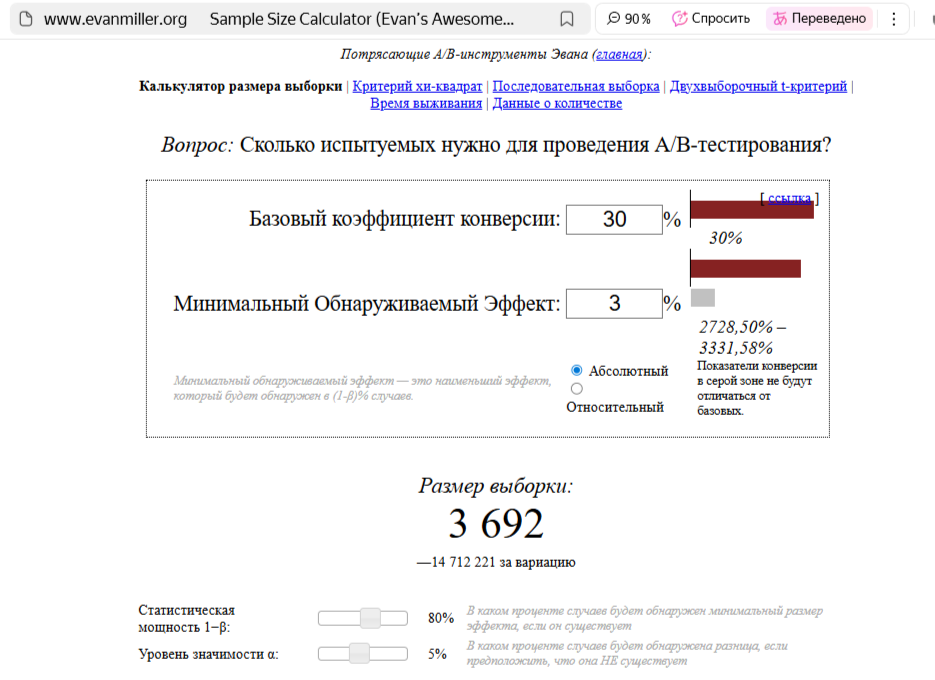

Достаточность выборки для получения статистически значимых результатов теста по Эвану Миллеру составила 3 692 пользователя.
В прводимом тесте количество уникальных пользователей в группе А: 4952, в группе B: 5011.
Размер нашей выборки достаточен для проведения теста.

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [ ]:
duplicate_count = events_7_days.duplicated().sum()
print(f"Количество дубликатов событий: {duplicate_count}")

# Рассчитываем конверсию по группам
# Находим пользователей, совершивших покупку в первые 7 дней
purchases = events_7_days[(events_7_days['user_id'].isin(interface_eu_users)) & 
                         (events_7_days['event_name'] == 'purchase')]

# Убираем дубликаты покупок по пользователям (нам важен факт покупки, а не количество)
purchases = purchases.drop_duplicates('user_id')

# Добавляем информацию о группе
purchases = purchases.merge(participants_eu_test[['user_id', 'group']], on='user_id', how='left')

# Считаем количество покупателей по группам
buyers_per_group = purchases.groupby('group')['user_id'].nunique().reset_index(name='buyers')

# Общее количество пользователей по группам
total_per_group = participants_eu_test.groupby('group')['user_id'].nunique().reset_index(name='total_users')

# Объединяем данные
summary = buyers_per_group.merge(total_per_group, on='group')
summary['conversion'] = (summary['buyers'] / summary['total_users']).round(3)

print("Конверсия по группам:")
display(summary)

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

In [ ]:
# Рассчитываем изменение конверсии
conv_A = summary.loc[summary['group'] == 'A', 'conversion'].values[0]
conv_B = summary.loc[summary['group'] == 'B', 'conversion'].values[0]

# Абсолютное изменение в процентных пунктах
conv_change_abs = (conv_B - conv_A) * 100

# Относительное изменение в процентах
conv_change_rel = (conv_B - conv_A) / conv_A * 100

print(f"Изменение конверсии (абсолютное): {conv_change_abs:.2f} п.п.")
print(f"Изменение конверсии (относительное): {conv_change_rel:.2f}%")

Результаты эксперимента показывают, что в группе с новым интерфейсом (B) уровень конверсии достиг 29,5%, в то время как в контрольной группе (A) этот показатель составил 27,8%. Наблюдается положительная динамика — прирост конверсии в тестовой группе относительно контрольной.

Однако величина данного улучшения (1,7 процентных пункта) не достигает порогового значения в 3 процентных пункта, установленного в гипотезе исследования как минимально значимый эффект.

Ключевой вопрос для принятия решения:
Является ли выявленное различие в 1,7 п.п. статистически значимым, или оно может быть следствием случайных колебаний данных? Для формирования окончательного вывода требуется проведение статистической проверки значимости наблюдаемых различий.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Для проверки статистической значимости различий в конверсии между тестовой и контрольной группами используется Z-тест для двух пропорций, что обусловлено:

- Характером метрики (долевой показатель - конверсия)

- Независимостью выборок (группы A и B)

- Достаточно большим размером выборки

Формализация гипотез:

- Нулевая гипотеза (H₀): Конверсия в группе B ≤ Конверсии в группе A
(p_B ≤ p_A)

- Альтернативная гипотеза (H₁): Конверсия в группе B > Конверсии в группе A
(p_B > p_A)

Параметры теста:

- Уровень значимости: α = 0,05 (95% доверительная вероятность)

- Критическая область: правосторонняя (соответствует направленной альтернативной гипотезе)

In [ ]:
# Проведем Z-тест для проверки статистической значимости
buy = summary.sort_values('group', ascending=False)['buyers'].values
all_users = summary.sort_values('group', ascending=False)['total_users'].values

stat_ztest, p_value_ztest = proportions_ztest(buy, all_users, alternative='larger')

print(f"Результаты Z-теста:")
print(f"Z-статистика: {stat_ztest:.4f}")
print(f"p-value: {p_value_ztest:.4f}")

alpha = 0.05
print(f"\nУровень значимости: α = {alpha}")

if p_value_ztest < alpha:
    print("Отклоняем H₀: Конверсия в группе B статистически значимо выше, чем в группе A.")
else:
    print("Нет оснований отклонить H₀: Статистически значимых различий в конверсии между группами не выявлено.")

- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Конверсия в группе B составила 29,5% против 27,8% в группе A — прирост 1,7 п.п. Хотя разница статистически значима (p-value = 0,0283), она не достигает целевого показателя в 3 п.п., установленного в ТЗ.

Рекомендации:

- Отказаться от внедрения нового интерфейса на текущем этапе

- Обсудить с заказчиком варианты доработки интерфейса для усиления эффекта

- Рассчитьвать повторный тест с увеличенной выборкой или продолжительностью

Целевой показатель не достигнут, но положительная динамика подтверждена статистически.